In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install statsmodels

In [3]:
# Importing necessary libaries

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [4]:
# Reading the dataset
cars = pd.read_csv('/Users/vamshikrishnanalla/Downloads/used_cars.csv')
cars = cars.rename(columns={'milage':'Odometer'})
cars.head()

,brand,model,model_year,Odometer,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   Odometer      4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [6]:
# T property is used to transpose index and columns of the data frame. The property T is somehow related to method transpose().
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
model_year,4009.0,2015.51559,6.104816,1974.0,2012.0,2017.0,2020.0,2024.0


In [7]:
# DATA PREPROCESSING

In [8]:
cars.isnull().sum()

brand             0
model             0
model_year        0
Odometer          0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [9]:
# Viewing unique entities present in the columns
for i in cars.columns:
    print(i, ':', len(cars[i].unique()))

brand : 57
model : 1898
model_year : 34
Odometer : 2818
fuel_type : 8
engine : 1146
transmission : 62
ext_col : 319
int_col : 156
accident : 3
clean_title : 2
price : 1569


In [10]:
# Analysis of years involved in the year column.
year = cars.model_year.unique()
year

array([2013, 2021, 2022, 2015, 2016, 2017, 2001, 2020, 2019, 2003, 2018,
       2023, 2000, 2006, 2011, 2012, 2007, 2014, 2005, 2009, 2010, 2004,
       2008, 1997, 1999, 1993, 2002, 1998, 2024, 1996, 1974, 1992, 1995,
       1994])

In [11]:
# Analysing the car count distribution across the year
cars.model_year.value_counts()

model_year
2022    354
2021    350
2020    322
2018    315
2019    297
2016    268
2017    259
2015    228
2023    226
2014    181
2013    158
2012    141
2011    124
2008    113
2010    100
2007     98
2005     72
2009     72
2006     66
2004     60
2003     49
2001     34
2002     32
2000     17
1999     15
1998     11
1997      9
1993      9
1996      8
1994      7
2024      6
1995      6
1974      1
1992      1
Name: count, dtype: int64

In [12]:
# Year 2060 is wrong value imputation
cars.drop(cars[cars.model_year==2060].index,inplace=True)
cars.model_year.unique()

array([2013, 2021, 2022, 2015, 2016, 2017, 2001, 2020, 2019, 2003, 2018,
       2023, 2000, 2006, 2011, 2012, 2007, 2014, 2005, 2009, 2010, 2004,
       2008, 1997, 1999, 1993, 2002, 1998, 2024, 1996, 1974, 1992, 1995,
       1994])

In [13]:
# In the year 1970 only two entries and it acts as an outlier and hence we can drop it.
# We gen z/ millennials are not really interested in the old models which came far before our birth

cars.drop(cars[cars.model_year==1970].index,inplace=True)
cars.model_year.unique()

array([2013, 2021, 2022, 2015, 2016, 2017, 2001, 2020, 2019, 2003, 2018,
       2023, 2000, 2006, 2011, 2012, 2007, 2014, 2005, 2009, 2010, 2004,
       2008, 1997, 1999, 1993, 2002, 1998, 2024, 1996, 1974, 1992, 1995,
       1994])

In [14]:
# Remove all the completely duplicated rows to ensure high accuracy and uniqueness of the dataset.
cars = cars.drop_duplicates()
cars.duplicated().sum()

np.int64(0)

In [15]:
#EDA OF USED_CARS

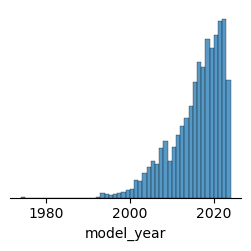

In [16]:
# Pair plot to analyses the relationship between the features present in the dataset.
sns.pairplot(cars, corner = True)

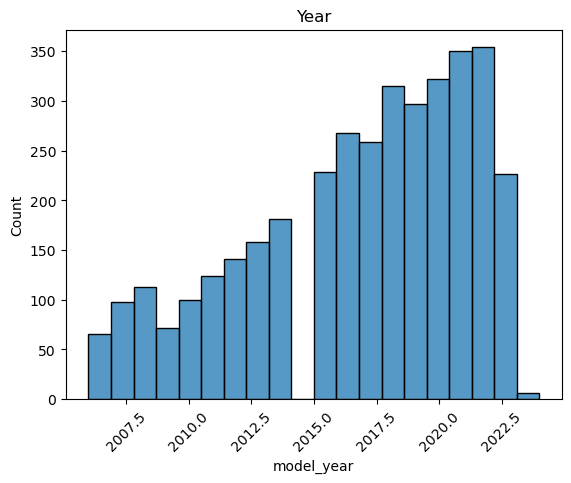

In [17]:
# We will cap the year from 1970 in order to make our model more relevant to real-time data.
# The car usage has increases rapidly in the last few years
sns.histplot(x="model_year", data=cars.query("model_year > 2005"), bins=20).set(title = "Year")
plt.xticks(rotation=45);

In [18]:
#CATEGORICAL VARIABLE ANALYSIS

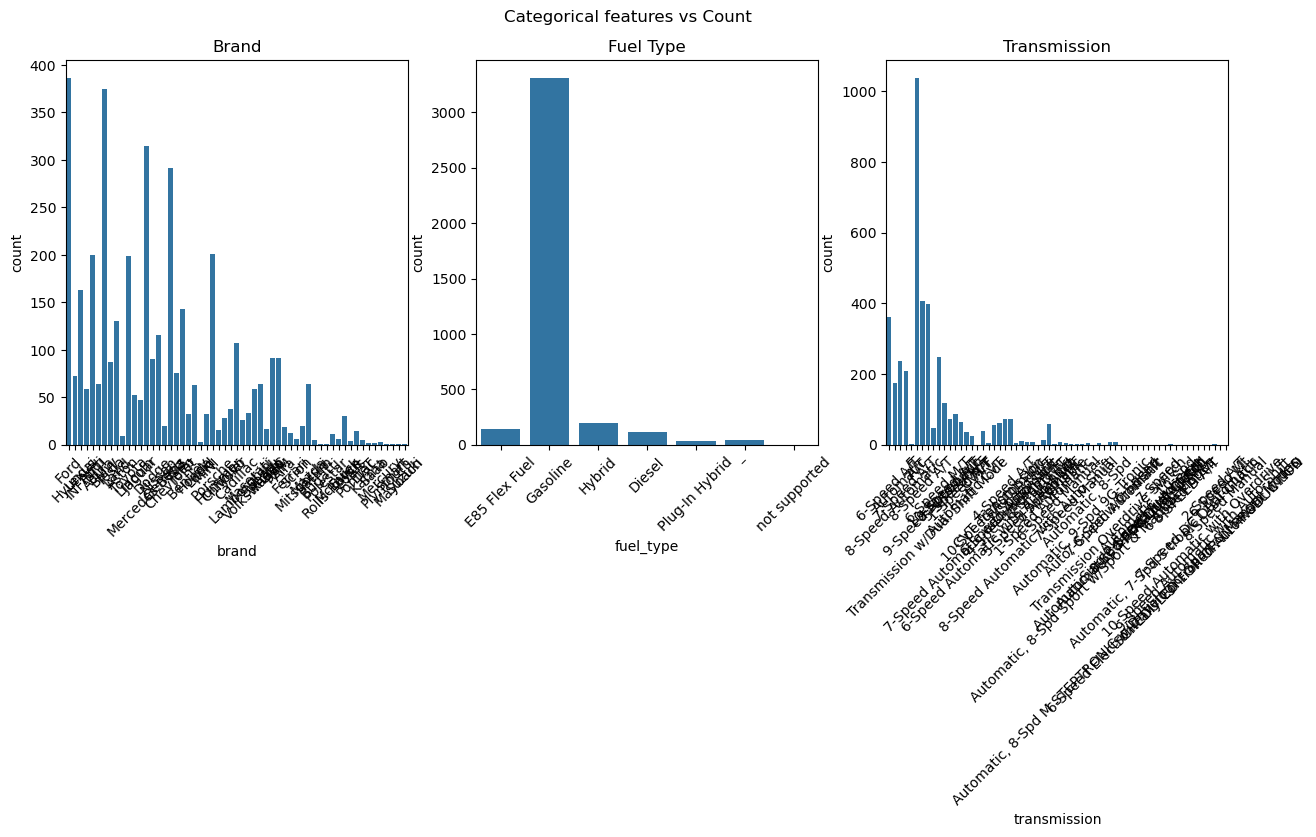

In [19]:
# Count plots for "Make", "Fuel type", "Transmission"
def plot_cat(df):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Categorical features vs Count')

    # Make
    sns.countplot(ax=axes[0], x="brand", data=cars)
    axes[0].set_title("Brand")
    axes[0].tick_params(axis='x', rotation=45)

    # FuelType
    sns.countplot(ax=axes[1], x="fuel_type", data=cars)
    axes[1].set_title("Fuel Type")
    axes[1].tick_params(axis='x', rotation=45)

    # Transmission
    sns.countplot(ax=axes[2], x="transmission", data=cars)
    axes[2].set_title("Transmission")
    axes[2].tick_params(axis='x', rotation=45)
plot_cat(cars)

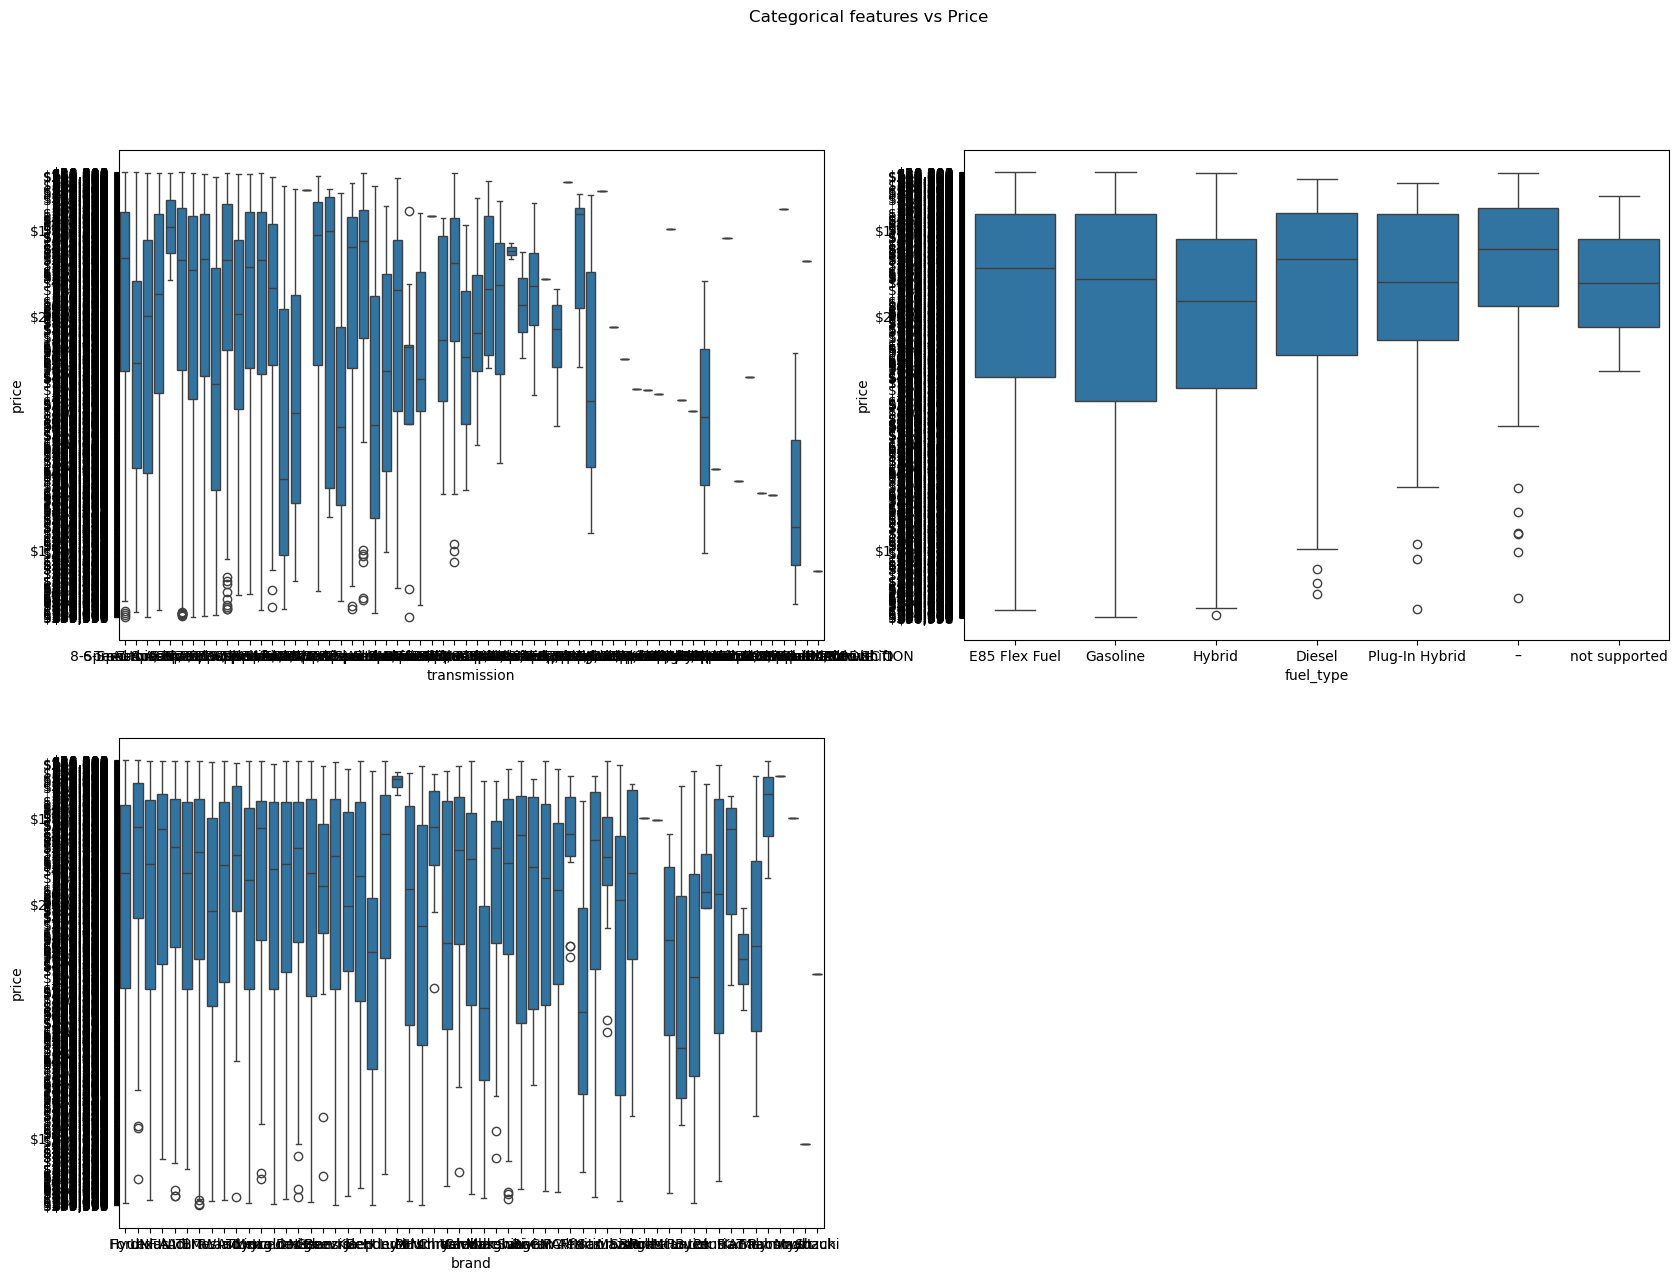

In [20]:
# Price distribustion of the cars based on transmission, fuel type and make
plt.figure(figsize=(20, 14))
plt.suptitle('Categorical features vs Price')
plt.subplot(2,2,1)
sns.boxplot(x = 'transmission', y = 'price', data = cars)
plt.subplot(2,2,2)
sns.boxplot(x = 'fuel_type', y = 'price', data = cars)
plt.subplot(2,2,3)
sns.boxplot(x = 'brand', y = 'price', data = cars)
plt.show()

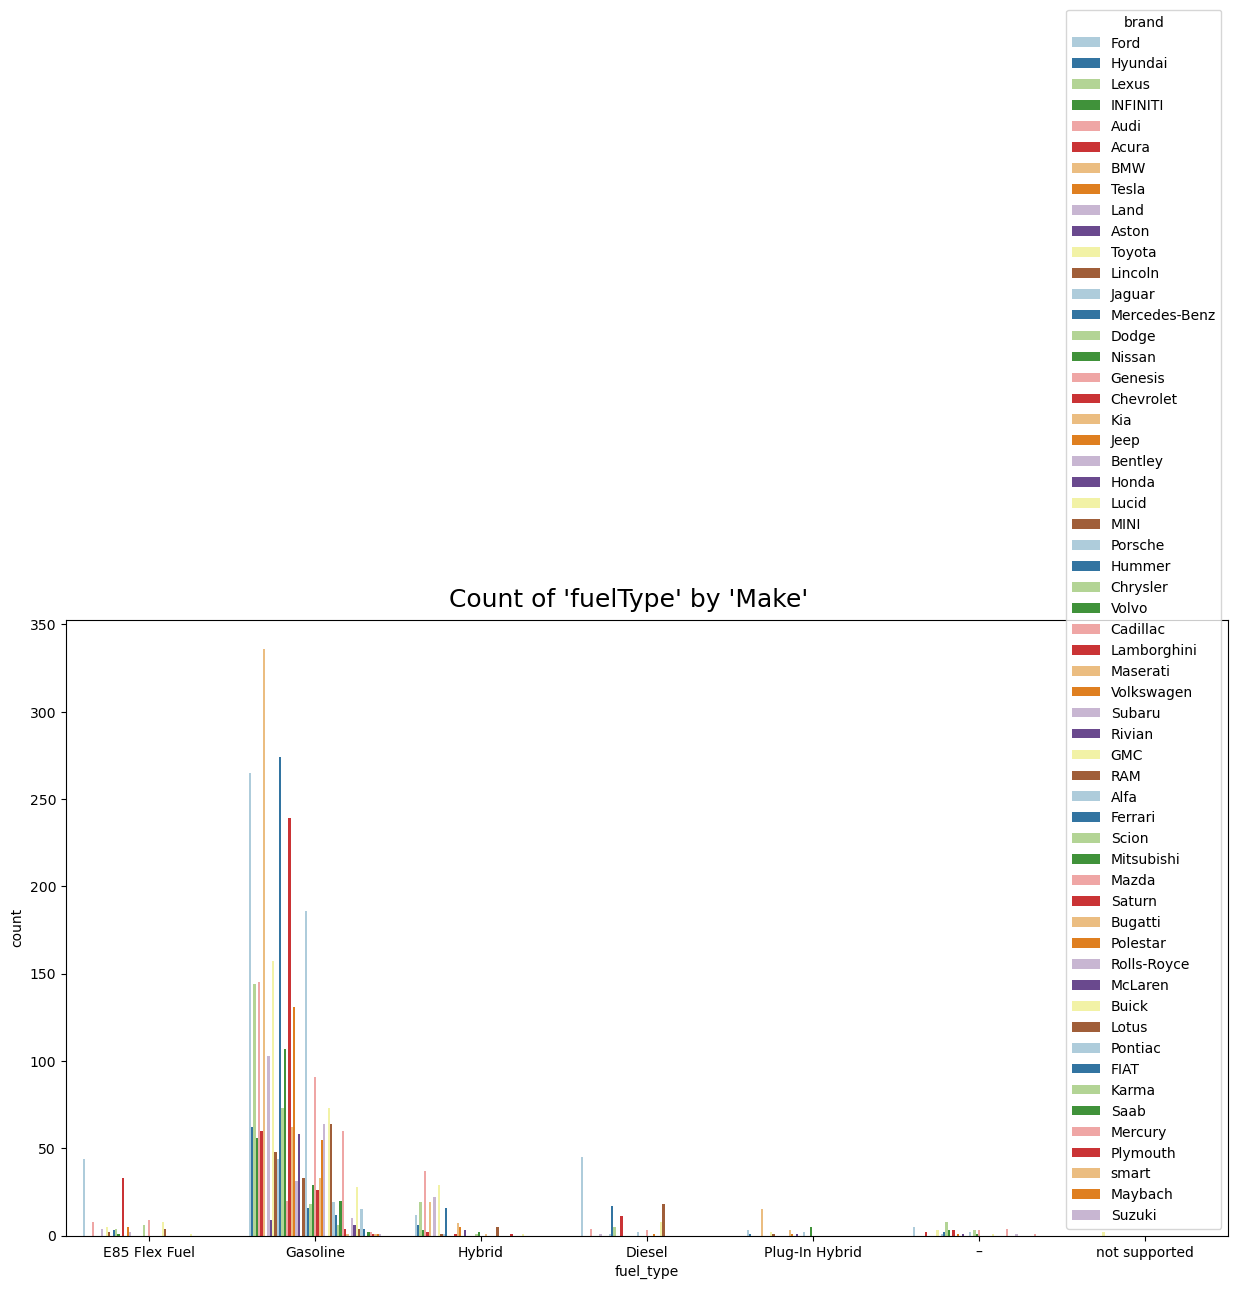

In [21]:
# Count of 'fuelType' by 'Make'
fig=plt.figure(figsize=(15,8))
plt.suptitle("Count of 'fuelType' by 'Make'", x=0.5 ,y=0.92, size=18)
sns.countplot(data=cars, x='fuel_type', hue='brand', palette="Paired")
plt.show()

In [22]:
print(cars['price'].dtype)

object


In [23]:
cars['price'] = pd.to_numeric(cars['price'], errors='coerce')

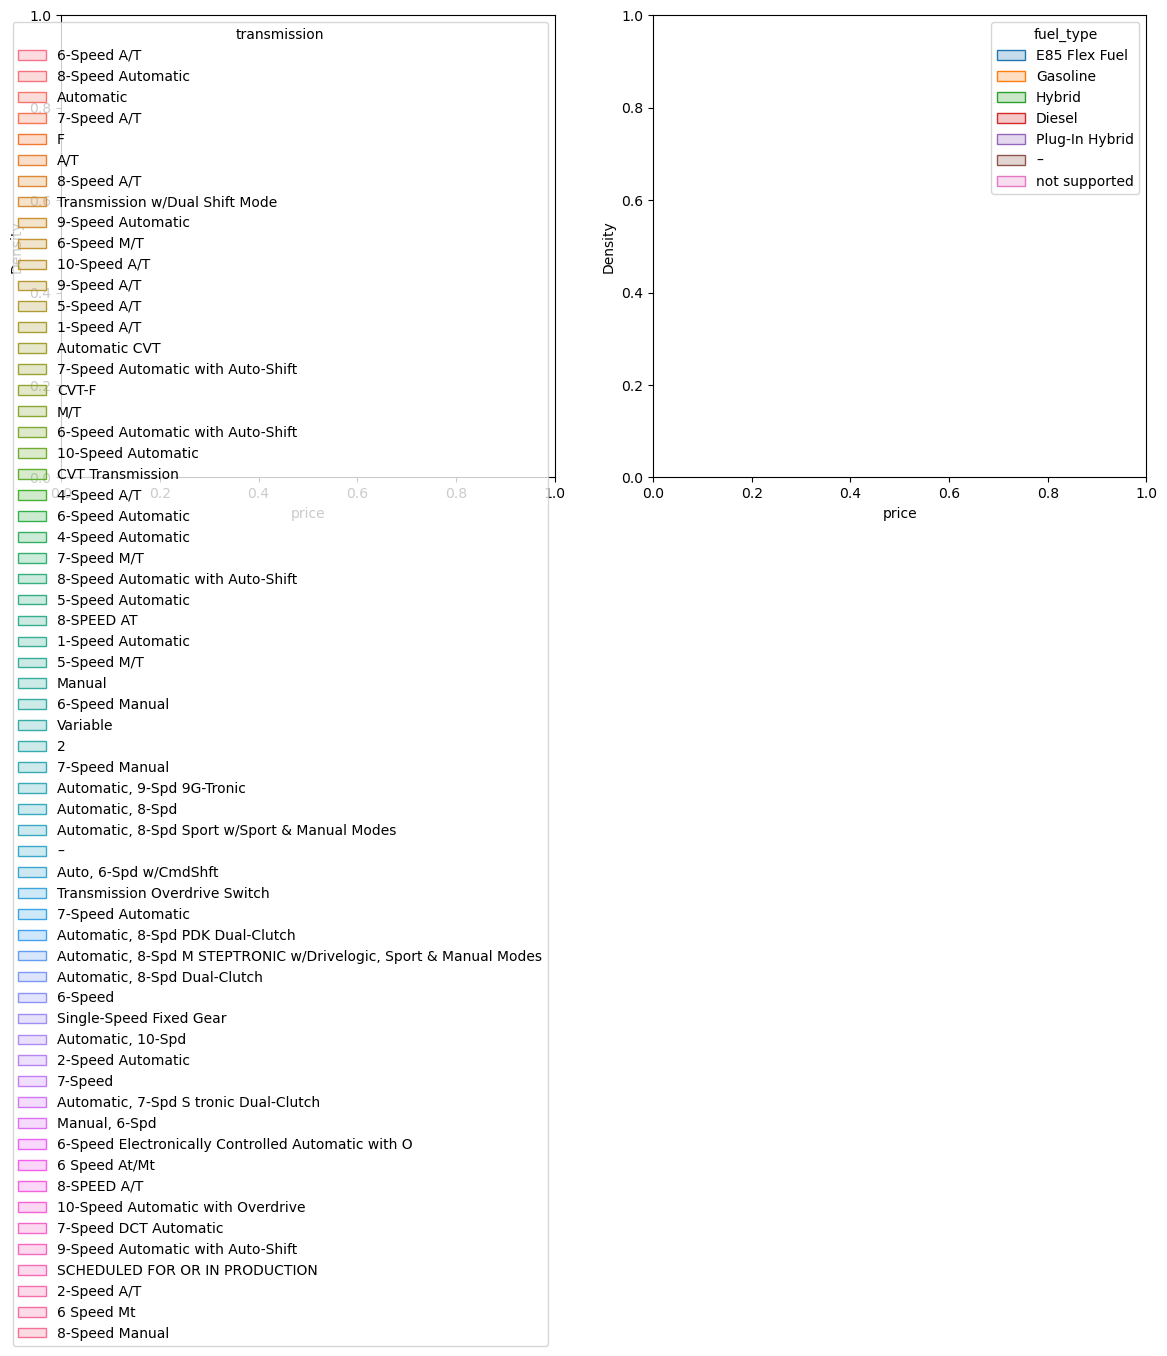

In [24]:
# Understand the price distribustion based on transmission and fueltype
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.kdeplot(ax=ax[0], x='price', hue='transmission', data=cars, fill = True)
sns.kdeplot(ax=ax[1], x='price', hue='fuel_type', data=cars, fill = True)

fig.tight_layout(pad=1)
plt.show()

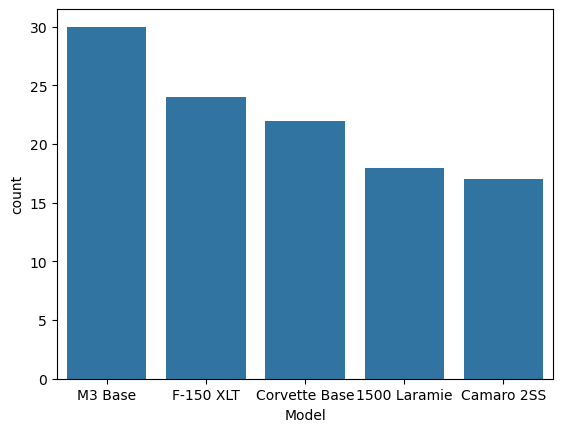

In [25]:
# Top 5 most sold car models
cars_model = cars.model.value_counts().head().reset_index()
cars_model.columns = ['Model','count']
sns.barplot(data=cars_model,x="Model",y="count")
plt.show()

In [26]:
# DATA PREPARATION

In [27]:
cars.transmission.value_counts()

transmission
A/T                                              1037
8-Speed A/T                                       406
Transmission w/Dual Shift Mode                    398
6-Speed A/T                                       362
6-Speed M/T                                       248
                                                 ... 
Automatic, 8-Spd PDK Dual-Clutch                    1
Auto, 6-Spd w/CmdShft                               1
Automatic, 8-Spd Sport w/Sport & Manual Modes       1
CVT-F                                               1
8-Speed Manual                                      1
Name: count, Length: 62, dtype: int64

In [28]:
# We will replace "other" with most frequent category(Mode) "Manual". Since "other" has only 9 rows in total.
cars['transmission'] = cars['transmission'].replace('Other','Manual')

In [29]:
cars.transmission.value_counts()

transmission
A/T                                              1037
8-Speed A/T                                       406
Transmission w/Dual Shift Mode                    398
6-Speed A/T                                       362
6-Speed M/T                                       248
                                                 ... 
Automatic, 8-Spd PDK Dual-Clutch                    1
Auto, 6-Spd w/CmdShft                               1
Automatic, 8-Spd Sport w/Sport & Manual Modes       1
CVT-F                                               1
8-Speed Manual                                      1
Name: count, Length: 62, dtype: int64

In [ ]:
# Since, we have less number of "Electric" vehicle.
# we will assign "Electric" fuelType with "Other" as it doesn't provide significant information to the model.
cars['fuel_type'] = cars['fuel_type'].replace('Electric', 'Other')
cars.fuel_type.value_counts()